In [19]:
import pds.pds_funcs as ruairi
from pds.OpenEphys import loadContinuous
from glob import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.signal import butter, lfilter
import scipy.signal as ss
import pandas as pd
import numpy as np

In [1]:
def butter_lowpass(low_cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_low_cutoff = low_cutoff / nyq
    b_low, a_low = butter(order, normal_low_cutoff, btype='lowpass', analog=False)
    return b_low, a_low

def butter_lowpass_filter(data, low_cutoff, fs, order=5):
    b_low, a_low = butter_lowpass(low_cutoff, fs, order=order)
    y_low = lfilter(b_low, a_low, data)
    return y_low

In [3]:
data_dir = r'D:\CIT_WAY\good_eegchans'
recordings = ['CIT_WAY_02_2018-05-03_13-38-41_PRE']
os.chdir('\\'.join([data_dir, recordings[0]]))
continuous_files = glob('*.continuous')
data = loadContinuous(continuous_files[0])['data']

Loading continuous data...


In [10]:
print(data.shape)
print('Downsampling data')

#downsampled_data = ruairi.downsample_decimate(data=data)



print('\n', downsampled_array.shape)

(108394496,)
Downsampling data
Downsampling array
(108394496,)
(903288,)

 (903288,)


Filtering Data


Text(0.5,1,'Filtered data')

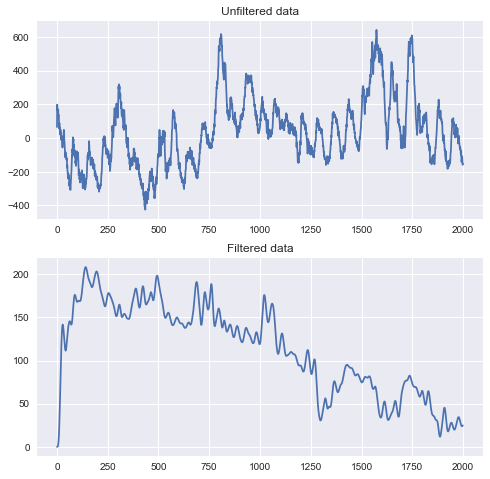

In [41]:
print('Filtering Data')
f, a = plt.subplots(nrows=2, figsize=(8,8))

a[0].plot(downsampled_data[:2000])
a[0].set_title('Unfiltered data')

filtered_data = butter_lowpass_filter(data=data, low_cutoff=100, fs=3000)

a[1].plot(filtered_data[:2000])
a[1].set_title('Filtered data')

In [42]:
downsampled_data = ruairi.downsample_decimate(data=data)

Downsampling array
(108394496,)
(903288,)


In [43]:
sampling_rate = 250
bin_size = sampling_rate * 4
binned_frequencies, binned_time, binned_Sxx = ss.spectrogram(downsampled_data,
                                                             250, ss.get_window('hamming', bin_size), noverlap=bin_size/2, nperseg=bin_size)

#Dataframe of the spectrogram results
df = pd.DataFrame(data=binned_Sxx,
                     columns=binned_time,
                     index=binned_frequencies).transpose()
df = df.reset_index()
df = df.rename(columns={'index': 'time'})
df['time'] = pd.to_timedelta(df['time'], unit='s')
df.set_index('time', inplace=True)

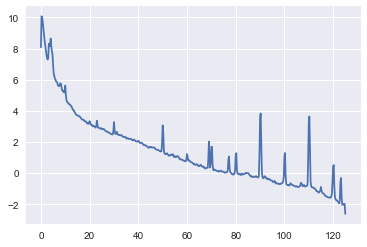

In [44]:
df_lowf = df.iloc[:, :]
mean_freqs = df_lowf.apply(np.mean, axis=0)
plt.plot(mean_freqs.index, np.log(mean_freqs))
plt.show()